# **Homework IV**
##### Grupo 41
##### Raquel Rodrigues (NºIST 106322) e Leonor Figueira (NºIST 106157)

## II. Programming and critical analysis

#### Pergunta 1)

##### a)

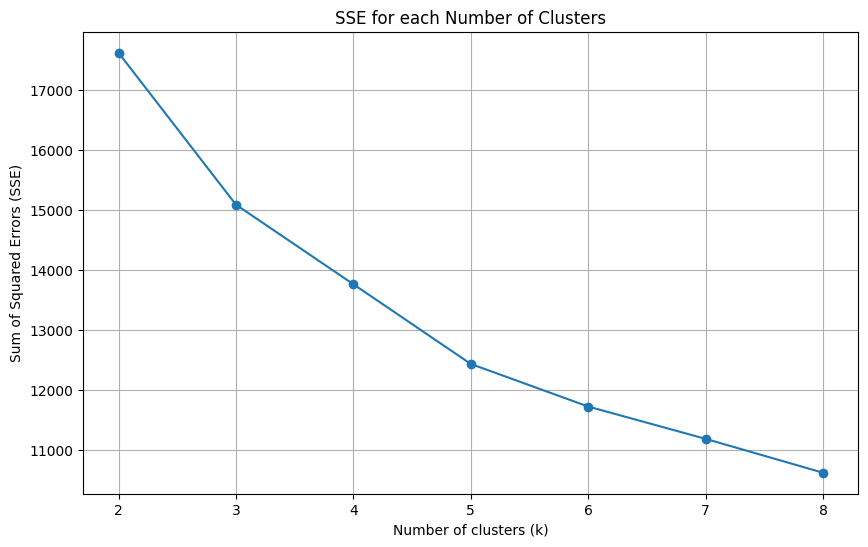

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('accounts.csv')

# Select the first 8 features
data = df.iloc[:, :8]

# Remove duplicates and null values
data = data.drop_duplicates()
data = data.dropna()

# Change the feature type from categorical to numerical 
data = pd.get_dummies(data, drop_first=True)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Define the range of k values (number of clusters)
k_values = [2,3,4,5,6,7,8]

# Store SSE values
sse = []

# Apply K-Means for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42, init='random')
    kmeans.fit_predict(scaled_data)
    sse.append(kmeans.inertia_)  # Inertia is the sum of squared errors (SSE)

# Plot the SSE for each k
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE for each Number of Clusters')
plt.grid(True)
plt.show()

##### b)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Com base no gráfico que relaciona os valores de erro (*SSE*) com os diferentes números de *clusters*, é possível concluir que o número ótimo de *clusters* é 5.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Esta conclusão deriva do método do cotovelo, que identifica um ponto onde adicionar mais *clusters* deixa de resultar numa diminuição muito significativa do *SSE*, o que se traduz, graficamente, num ponto a partir do qual o declive fica menos acentuado. No gráfico obtido, tal ponto situa-se onde o número de *clusters* é 5. Até este ponto observa-se uma diminuição acentuada do *SSE*, sendo que para valores superiores a 5, o erro vai reduzindo pouco para cada incremento de k.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Desta forma, observamos como o trade-off entre os clusters e os valores de erro influencia esta escolha do número mais adequado de clusters. Apesar de o aumento do k levar a uma segmentação mais detalhada e um menor valor de erro, após um certo ponto (neste caso, k=5), os ganhos em termos de erro são marginais, enquanto a complexidade do modelo continua a aumentar.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Por este motivo, é necessário escolher um número de clusters em que o modelo é suficientemente complexo para capturar os padrões relevantes nos dados, resultando num SSE reduzido, mas que não introduza complexidade desnecessária. Logo, a partir do valor 5, a redução ligeira do valor de erro não compensa o ganho de complexidade.

##### c)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ao analisar as variáveis do conjunto de dados 'accounts.csv', podemos concluir que grande parte destas são categóricas como, por exemplo, 'job', 'marital' e 'education'. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;O método *k*-means calcula a distância euclidiana entre pontos e utiliza a média para determinar os centróides de cada *cluster* em cada iteração. Sendo assim, é uma abordagem que funciona com variáveis numéricas, mas não com variáveis categóricas. O método *k*-modes, por sua vez, determina os centróides através da moda de cada variável, isto é, a categoria mais frequente dessa variável num dado cluster, e atribui um ponto a determinado *cluster* consoante a sua semelhança aos centróides obtidos. Por este motivo, para agrupar observações com variáveis categóricas em segmentos diferentes, o *k*-modes é o método mais apropriado.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Considerando apenas as 8 primeiras *features* do conjunto de dados, usadas na pergunta 1), verificamos que apenas duas destas ('age' e 'balance') são numéricas. Se forem tomadas em conta todas as 16 *features*, as numéricas continuam em minoria ('age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous') e inclusive 'pdays' e 'previous' apresentam sempre os mesmos valores para todas as observações, pelo que não são *features* com grande relevância para a formação de modelos.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Uma vez que, em ambos os casos, os nossos dados são compostos maioritariamente por variáveis categóricas,  deduzimos que o *k*-modes seria, de facto, uma abordagem de *clustering* mais adequada do que o *k*-means.

#### Pergunta 2)

##### a)

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('accounts.csv')

# Select the first 8 features
data = df.iloc[:, :8]

# Remove duplicates and null values
data = data.drop_duplicates()
data = data.dropna()

# Change the feature type from categorical to numerical 
data_num = pd.get_dummies(data, drop_first=True)

# Normalize the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_num)

# Initialize PCA
pca = PCA(n_components=2)

# Fit PCA to scaled data
pca_result = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
total_variability = (explained_variance[0] + explained_variance[1])*100     # Percentage

print(f"Explained Variability by the top 2 components is {total_variability:.2f}%")

Explained Variability by the top 2 components is 22.76%


##### b)

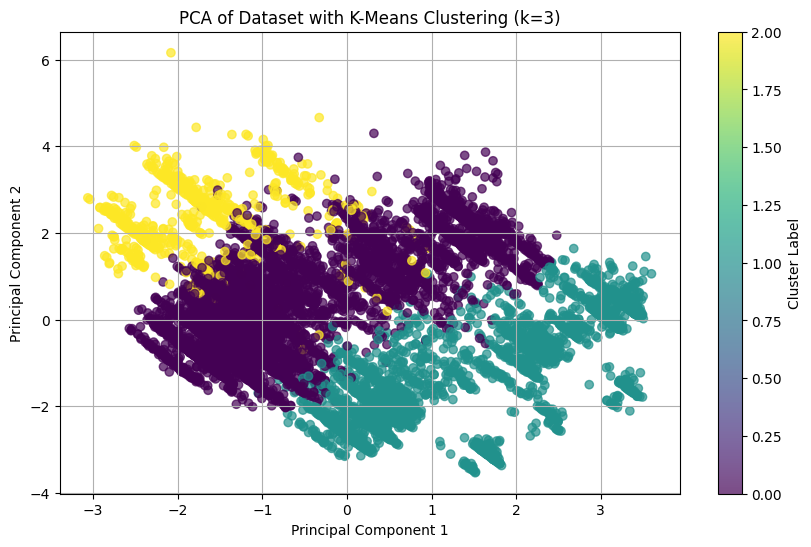

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply k-means clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('PCA of Dataset with K-Means Clustering (k=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

# from mpl_toolkits.mplot3d import Axes3D  # Import 3D plotting toolkit

# # Create a 3D scatter plot
# fig = plt.figure(figsize=(10, 6))
# ax = fig.add_subplot(111, projection='3d')  # Define 3D axis

# # Plot the 3D scatter plot using the first three principal components
# sc = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=clusters, cmap='viridis', alpha=0.7)

# # Add title and labels for the axes
# ax.set_title('3D PCA of Dataset with K-Means Clustering (k=3)')
# ax.set_xlabel('Principal Component 1')
# ax.set_ylabel('Principal Component 2')
# ax.set_zlabel('Principal Component 3')

# # Add a color bar to indicate cluster labels
# plt.colorbar(sc, label='Cluster Label')

# plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Através do gráfico obtido, é possível observar como os clusters não podem ser claramente separados com base apenas nos dois primeiros componentes principais.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;É possível observar que há uma sobreposição considerável entre os *clusters*, nomeadamente entre os *clusters* amarelo (2) e roxo (0), e  entre os clusters roxo (0) e azul (1). O desejado seria obter uma distância *intra-cluster* reduzida e uma distância *inter-cluster* elevada. Apesar de a distância *intra-cluster* obtida não ser muito grande, isto é, os *clusters* apresentam uma coesão razoável, a distância *inter-cluster* é relativamente pequena, dando origem à sobreposição.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;O *PCA* é uma técnica de redução de dimensionalidade através da *Feature extraction*, onde são criadas novas features com base nas originais. É importante notar que este método leva à perda de contexto e que fazer uma redução para apenas duas dimensões pode não ser suficiente para obter uma separação satisfatória entre *clusters*. De facto, concluímos na alínea anterior que os dois primeiros componentes explicam apenas 22,76% da variância. Isto significa que quase 80% da variância foi "perdida" ao comprimir o espaço de 8 dimensões para 2, ou seja, houve uma perda de informação. Esta perda explica o motivo pelo qual os clusters não parecem estar completamente separados no gráfico de *PCA*.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Portanto, as conclusões inferidas realçam as limitações da utilização do *PCA*, especialmente quando os componentes principais explicam apenas uma porção limitada da variância, o que pode resultar num gráfico onde os clusters parecem menos distintos do que poderiam realmente ser no espaço com as dimensões originais.


##### c)

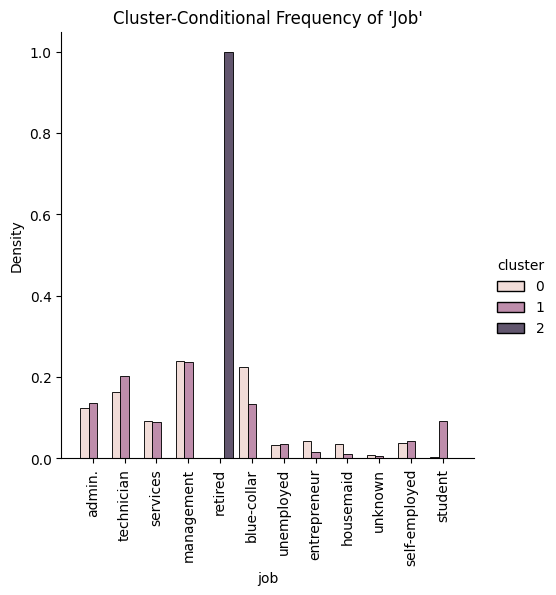

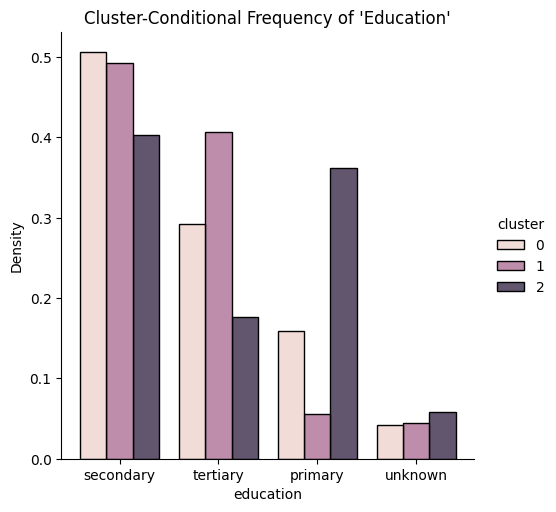

In [11]:
#import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.cluster import KMeans

# # Load the dataset
# df = pd.read_csv('accounts.csv')

# # One-hot encoding of categorical variables
# df_encoded = pd.get_dummies(df, drop_first=True)

# # Apply k-means clustering
# kmeans = KMeans(n_clusters=3, max_iter=500, random_state=42, init='random')
# df['cluster'] = kmeans.fit_predict(df_encoded)

# Add the cluster labels to the original dataframe
data['cluster'] = clusters

# Plot "job" feature
sns.displot(data, x='job', hue='cluster', multiple="dodge", stat='density', shrink=0.8, common_norm=False)
plt.title("Cluster-Conditional Frequency of 'Job'")
plt.xticks(rotation=90)  # Rotate the X-axis labels for better readability
plt.show()

# Plot "education" feature
sns.displot(data, x='education', hue='cluster', multiple="dodge", stat='density', shrink=0.8, common_norm=False)
plt.title("Cluster-Conditional Frequency of 'Education'")
plt.show()

Em primeiro lugar, no gráfico que apresenta as frequências dos diferentes valores da *feature* 'job', destaca-se imediatamente que a totalidade das observações do *cluster* 2 possui o valor 'retired', enquanto os outros dois *clusters* não têm qualquer representação para o mesmo. Isto indica que este *cluster* contém informações sobre os clientes reformados, estando bem separado dos restantes neste domínio.

Em segundo lugar, vemos que os cluster 0 e 1 parecem ser semelhantes no primeiro gráfico, com algumas diferenças. Primeiramente, tanto no cluster 0 como no cluster 1, a profissão mais popular é a de 'management', sendo que ambos têm aproximadamente a mesma percentagem de clientes nesta categoria. A maior disparidade entre os dois verifica-se para a profissão 'blue-collar', sendo que as observações respetivas pertencem predominantemente ao *cluster* 0, o que pode apontar para o facto de este *cluster* agrupar mais clientes da classe trabalhadora. Quanto às ocupações dominadas pelo *cluster* 1, temos a ocupação 'student', a qual praticamente não existe no *cluster* 0, ou seja, é neste grupo que se encontram os clientes que não entraram ainda no mercado de trabalho. Para as profissões 'technician' e 'admin', o *cluster* 1 tem, também, maior representação, no entanto, a diferença não é tão significativa. Com base nestas observações, podemos especular que o *cluster* 1 é composto por uma população mais jovem e, possivelmente, mais qualificada, já que têm maior representação face ao *cluster 0* nas profissões de administração e menor representação nas profissões de colarinho azul.

Por outro lado, olhando para o segundo gráfico, vemos que o *cluster* 2 tem maioritariamente o nível de educação secundária, seguida da educação primária. O facto de que menos de 20% dos clientes neste grupo completaram a educação superior ('tertiary') está de acordo com o observado no primeiro gráfico, onde verificámos que este grupo era composto por indivíduos reformados e que, por conseguinte, não deverá possuir o mesmo grau de qualificações que as gerações mais recentes. 

Quanto ao nível de educação dos restantes grupos, constatamos que o *cluster* com maior percentagem de observações no nível de educação superior é o *cluster* 1, como esperado segundo a análise do gráfico das pofissões. Ainda assim, a educação secundária continua a ser maioritária para todos os grupos. Além disso, vemos que, apesar de a percentagem de indivíduos com educação superior para estes dois *clusters* ser praticamente idêntica, ligeiramente inferior para o *cluster* 1, a percentagem de pessoas com educação primária é bastante inferior para o *cluster* 1 comparativamente ao *cluster* 2. Deste modo, concluímos novamente que o grupo 1 detém um nível mais elevado de qualificações, o que explica a distribuição de profissões no gráfico anterior.